In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [30]:
# ID is primary key
sum(df.groupby('ID').count()['Year_Birth'] > 1)

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Explore Categorical Data

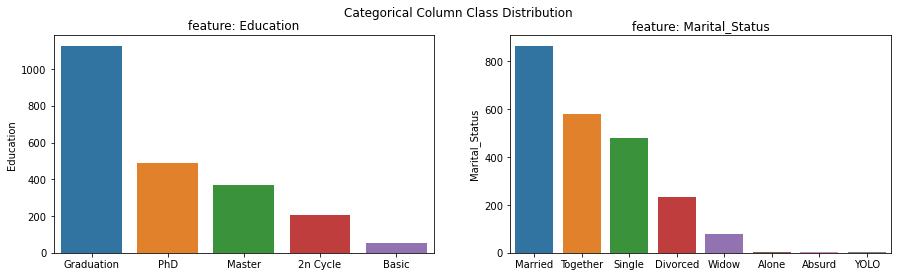

In [20]:
# select out categorical columns
category_col = df.select_dtypes(include='object').columns
category_col = category_col.drop("Dt_Customer")

fig, ax = plt.subplots(1,2,figsize=(15,4))
plt.suptitle("Categorical Column Class Distribution")
plt.subplots_adjust(hspace=0.3)
for var, subplot in zip(category_col, ax.flatten()):
    sns.barplot(x = df[var].value_counts().index, 
                y = df[var].value_counts(),
                ax = subplot).set(title ="feature: "+var)

In [7]:
# find all continuous column
continuous_col = df.select_dtypes(include=['int64','float64']).columns
continuous_col = continuous_col.drop("ID")

# select out possible categorical columns
category_col_add = []
for var in continuous_col:
    if len(df[var].unique())<5:
        category_col_add.append(var)

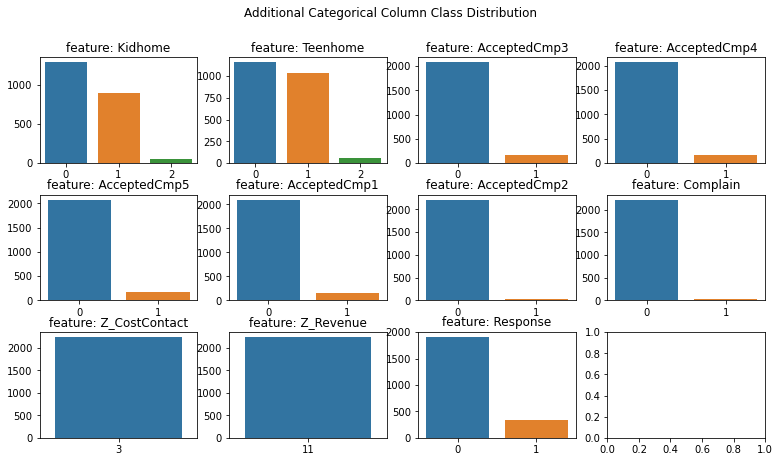

In [8]:
fig, ax = plt.subplots(-(-len(category_col_add)//4),4,figsize=(13,7))
plt.suptitle("Additional Categorical Column Class Distribution")
plt.subplots_adjust(hspace=0.3)
for var, subplot in zip(category_col_add, ax.flatten()):
    sns.barplot(x = df[var].value_counts().index, 
                y = df[var].value_counts(), 
                ax = subplot).set(ylabel = None, title ="feature: "+var)

`Kidhome` and `Teenhome` feature calculates how many kids/teens in one household. The maximum is 2. <br>
`Z_CostContact` and `Z_Revenue` may be able to be dropped because there is only one value for all data.

In [9]:
df_cleaned = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

#### Explore Continuous Data

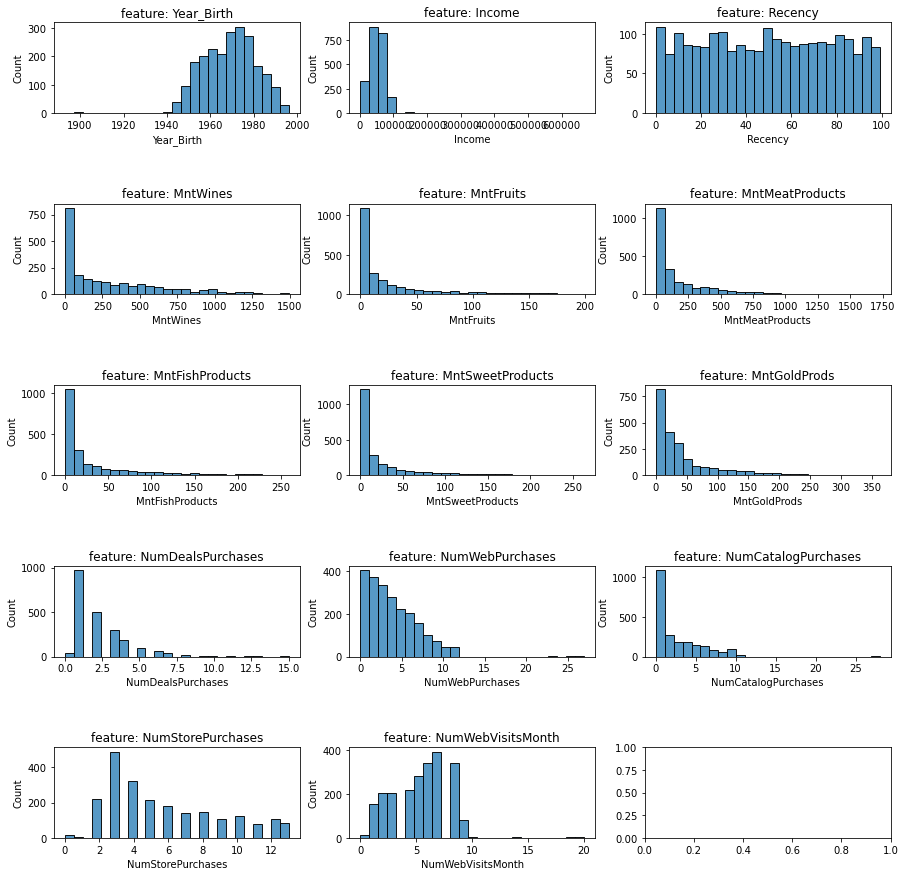

In [17]:
continuous_col_cleaned = continuous_col.drop(category_col_add)

fig, ax = plt.subplots(-(-len(continuous_col_cleaned)//3),3,figsize=(15,15))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(continuous_col_cleaned, ax.flatten()):
    sns.histplot(df[var],bins = 25, ax = subplot).set(title ="feature: "+var)

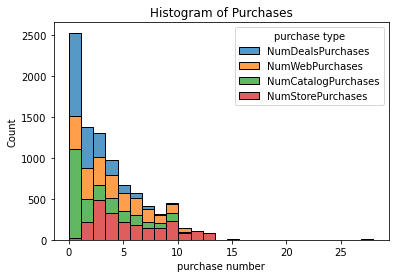

In [56]:
sns.histplot(data = pd.melt(df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']], var_name="purchase type", value_name='purchase number'),
             stat="count", multiple="stack",
             x="purchase number", hue="purchase type",
             bins = 25,
             element="bars").set(title = "Histogram of Purchases")
plt.show()

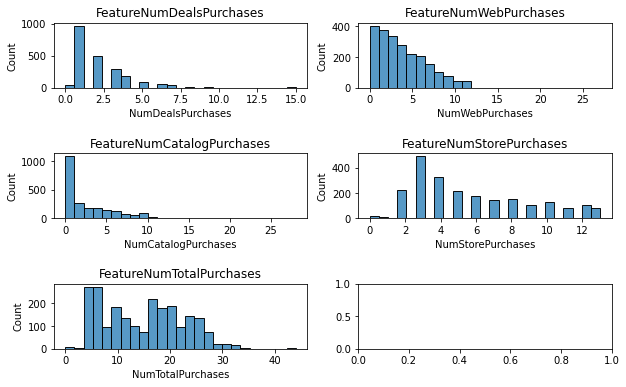

In [53]:
fig, ax = plt.subplots(-(-len(df_purchases.columns)//2),2,figsize=(10,6))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(df_purchases.columns, ax.flatten()):
    sns.histplot(df_purchases[var],bins = 25, ax = subplot).set(title ="Feature"+var)

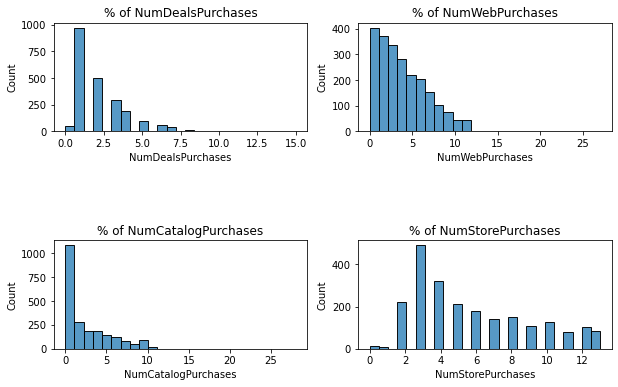

In [46]:
fig, ax = plt.subplots(-(-len(cols)//2),2,figsize=(10,6))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_purchases[var],bins = 25, ax = subplot).set(title ="% of "+var)

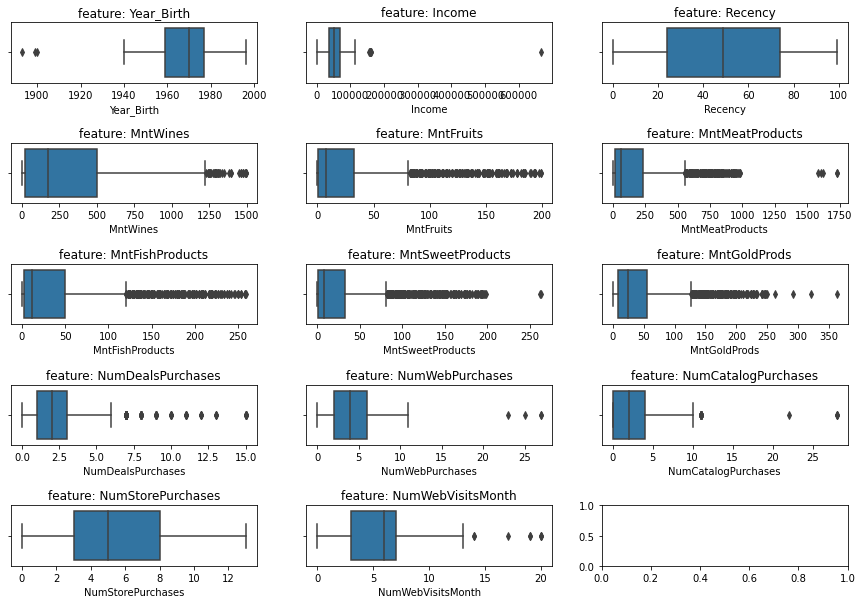

In [13]:
fig, ax = plt.subplots(-(-len(continuous_col_cleaned)//3),3,figsize=(15,10))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(continuous_col_cleaned, ax.flatten()):
    sns.boxplot(x = df[var], ax = subplot).set(title ="feature: "+var)

`Mnt` features (amount spent) share similar distribution for different kinds of product. <br>
`Income` has large outliers. <br>
`Recency` distribution is close to uniform (similar number of customers for each period of last purchase).

### Missing Data

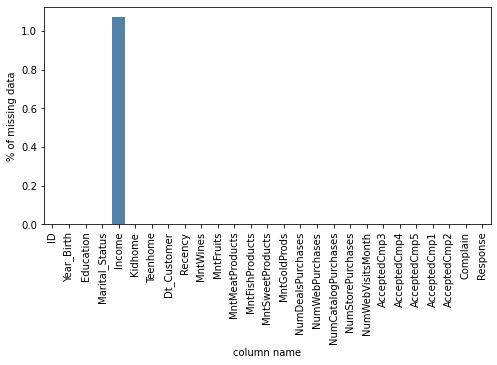

In [10]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x=df_cleaned.columns, y=np.sum(df_cleaned.isna())/df.shape[0]*100, 
                 color="steelblue")
ax.set(xlabel = "column name", ylabel = "% of missing data")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Only income column has missing data (may be because the respondant not willing to tell their income) <br>
Only account for around 1% -> not too much (maybe can be dropped)

# Data Cleaning

In [79]:
df_cleaned = df.copy()
df_cleaned['Income'] = df_cleaned['Income'].fillna(df_cleaned['Income'].median())

# drop columns "Z_CostContact" and "Z_Revenue"
df_cleaned = df_cleaned.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

# primary key is id
df_cleaned=df_cleaned.set_index("ID")

# convert Year_Birth into age
df_cleaned["Age"] = 2014-df_cleaned["Year_Birth"]
df_cleaned = df_cleaned.drop('Year_Birth', axis = 1)

# convert "Marital_Status" into a feature showing if a person is single or not at present
df_cleaned["IfSingle"] = df_cleaned["Marital_Status"].replace({'Single':1, 'Divorced':1, 'Widow':1, 'Alone':1, 'Absurd':1, 'YOLO':1, 'Together':0, 'Married':0})

# encoding for "Education" - hierarchy so use ordinal
df_cleaned["Education"] = df_cleaned["Education"].replace({'Basic':0, 'Graduation':1, '2n Cycle':2, 'Master': 3, 'PhD': 4})

# Convert "Dt_Customer" into the number of days after customers' enrollment
df_cleaned["Dt_Customer"] = pd.to_datetime(df_cleaned["Dt_Customer"])
max_date = df_cleaned["Dt_Customer"].unique().max()
df_cleaned["EnrollDays"] = (max_date - df_cleaned["Dt_Customer"]).dt.days
df_cleaned=df_cleaned.drop(columns=["Dt_Customer"],axis=1)

# Calculate the total expense
df_cleaned['Expenses'] = df_cleaned["MntWines"]+df_cleaned["MntFruits"]+df_cleaned["MntMeatProducts"]+df_cleaned["MntFishProducts"]+df_cleaned["MntSweetProducts"]+df_cleaned["MntGoldProds"]

# Calculate the number of total purchases
df_cleaned["NumPurchases"] = df_cleaned["NumWebPurchases"] + df_cleaned["NumCatalogPurchases"] + df_cleaned["NumStorePurchases"]

# Calculate the number of accepted campaign
df_cleaned["NumAcceptedCmp"] = df_cleaned["AcceptedCmp1"] + df_cleaned["AcceptedCmp2"] + df_cleaned["AcceptedCmp3"] + df_cleaned["AcceptedCmp4"] + df_cleaned["AcceptedCmp5"] + df_cleaned['Response']
# If number>=1 then accepted one of the campaigm
df_cleaned['AcceptedAnyCmp'] = df_cleaned["NumAcceptedCmp"].apply(lambda x: "Yes" if x >=1  else "No")#(df_cleaned["NumAcceptedCmp"]>=1)


In [80]:
df_cleaned.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'IfSingle', 'EnrollDays', 'Expenses',
       'NumPurchases', 'NumAcceptedCmp', 'AcceptedAnyCmp'],
      dtype='object')

In [81]:
continuous_col_lst = continuous_col_cleaned.tolist()
continuous_col_lst.remove('Year_Birth')
continuous_col_lst.append('Age')
continuous_col_lst.append('EnrollDays')
continuous_col_lst

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'EnrollDays']

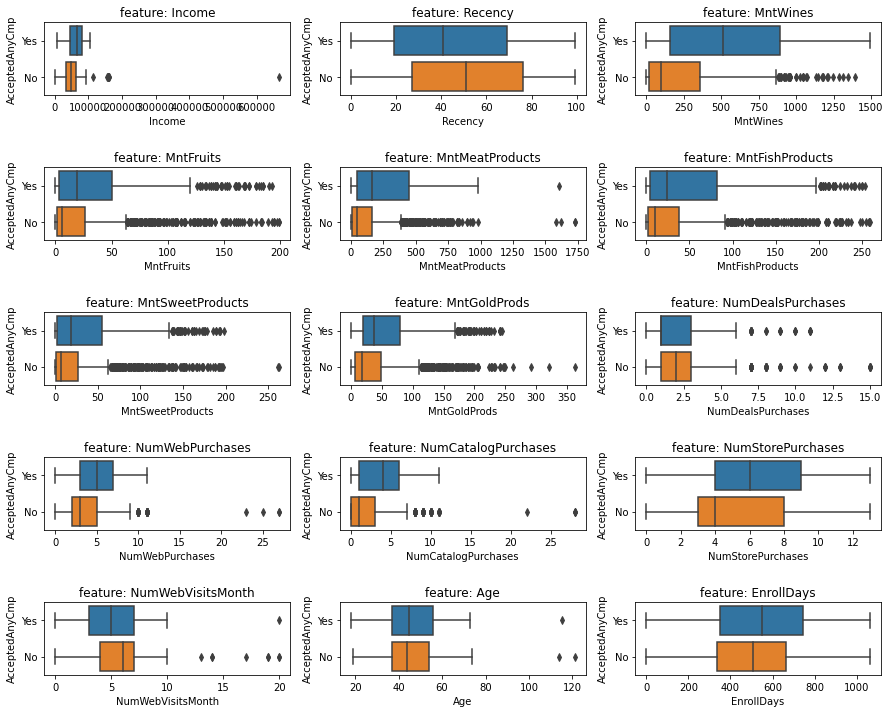

In [85]:
fig, ax = plt.subplots(-(-len(continuous_col_cleaned)//3),3,figsize=(15,12))
plt.subplots_adjust(hspace=1)
for var, subplot in zip(continuous_col_lst, ax.flatten()):
    sns.boxplot(x = df_cleaned[var], y = df_cleaned["AcceptedAnyCmp"], ax = subplot).set(title ="feature: "+var)

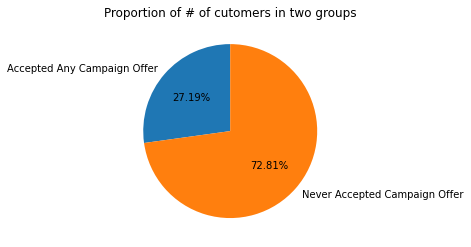

In [84]:
labels = 'Accepted Any Campaign Offer', 'Never Accepted Campaign Offer'
yes_portion = np.round(df_cleaned.query("AcceptedAnyCmp == 'Yes'").shape[0]/df_cleaned.shape[0]*100,2)

plt.pie([yes_portion, 100 - yes_portion], labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Proportion of # of cutomers in two groups")
plt.show()